Documentation: https://pypi.org/project/gym-super-mario-bros/

# Setup the environment

In [444]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import RIGHT_ONLY, SIMPLE_MOVEMENT, COMPLEX_MOVEMENT 
from matplotlib import pyplot as plt
import time
import copy
import math
import random

In [445]:
# Create the Super Mario Environment
env = gym_super_mario_bros.make('SuperMarioBros-v2')
# limit the possible movements
env = JoypadSpace(env, COMPLEX_MOVEMENT) 
# Start the game
state = env.reset()

# Run this cell again if the game on the Python Render Window got stucked

# Running the game with random actions

In [446]:
done = True
for step in range(600):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    time.sleep(0.01)
    env.render()
env.close()
env = gym_super_mario_bros.make('SuperMarioBros-v2')
env = JoypadSpace(env, COMPLEX_MOVEMENT) 
state = env.reset()

# Vizualizing the environment

In [447]:
# Visualize the current state
def visualize(state):
    plt.figure(figsize=(5,3))
    plt.imshow(state)
    plt.show()

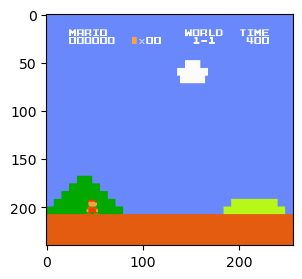

In [448]:
# Start the game and visualize it
visualize(state)

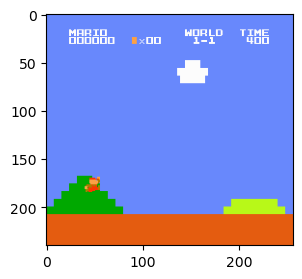

In [449]:
# Jump button
jump = COMPLEX_MOVEMENT.index(['A'])
# Do the jump action
state, reward, done, info = env.step(jump)
# Because visualizing is frame by frame i'll do some NOOP
noop = COMPLEX_MOVEMENT.index(['NOOP'])
[env.step(noop) for i in range(10)]
visualize(state)

# Genetic algorithm

The steps for the genetic algorithm are:

1. Create population
2. Small mutation
3. Test population
4. Evaluate population (fitness function)
5. Select best individual(return to point 1 if needed)

In [450]:
# Game can be actually be solved with 2 types of movement
def get_random_action():
    #return random.randint(0,len(COMPLEX_MOVEMENT)-1)
    return random.randint(1,2)

In [451]:
# Each individual(agent) will consist of a series of actions
class Individual:
    def __init__(self, leader):
        # The 1st iteration will have no leaders
        if leader is None:
            self.actions = [get_random_action() for _ in range(size_actions)]
        # Else we copy the best previous individual
        else:
            self.actions = copy.deepcopy(leader.actions)
            if len(self.actions) < size_actions:
                self.actions = self.actions + [get_random_action() for _ in range(size_actions-len(self.actions))]
            elif len(self.actions) > size_actions:
                self.actions = self.actions[:size_actions]

In [452]:
# Create size times new individuals
def create_population(size, leader=None):
    return [Individual(leader) for i in range(size)]

In [453]:
# For each action there is a small change to mutate
def mutation(population,jumps=False):
    for individual in population:
        for pos in range(len(individual.actions)):
            if random.randint(0,100) < learning_rate:
                individual.actions[pos] = get_random_action()
                if jumps:
                    individual.actions[pos] = 2

In [454]:
# Each individual will 'run' through his actions in the environment
def test_population(population):
    info_population = []
    for individual in population:
        env.reset()
        for action in individual.actions:
            state, reward, done, info = env.step(action)
            if done:
                break
        info_population.append(info['x_pos'])
    return info_population        

In [455]:
# In this case I will only consider as best the most right advanced individual
def evaluate(distances):
    index = distances.index(max(distances))
    return index

In [456]:
def select_leader(population, pos):
    return population[pos]

# Show the game of agent

In [457]:
def show_game(agent,fast=False):
    env = gym_super_mario_bros.make('SuperMarioBros-v2')
    env = JoypadSpace(env, COMPLEX_MOVEMENT)
    env.reset()
    for action in agent.actions:
        state, reward, done, info = env.step(action)
        if done:
            break
        if not fast:
            time.sleep(0.0001)
        env.render()
    env.close()

# Run the algorithm

In [306]:
# Run for initial setup
leader = None
previous = -math.inf
generation = 1
furthest = []

In [442]:
# Max size of actions an individual can do
size_actions = 2560
# Size of population
size_population = 2
# Probability to change 1 action
learning_rate = -1
# Number of generations
generations = 1

In [443]:
# For each generation, we run all the individuals and choose the best.
for _ in range(generations):
    population = create_population(size_population, leader)
    mutation(population)
    distances = test_population(population)
    if max(distances) >= previous:
        previous = max(distances)
        best = evaluate(distances)
        leader = select_leader(population, best)
        furthest.append(leader)
    print(f"Generation: {generation}")
    print(f"Score: {max(distances)}")
    generation+=1

Generation: 16
Score: 3155


In [436]:
show_game(population[0],fast=True)